In [1]:
## Fraud detection data cleaning for inpatient data
import numpy as np
import pandas as pd 
import re
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
ip_train_df = pd.read_csv('Train_Inpatientdata-1542865627584.csv',na_values=[''])
ip_test_df = pd.read_csv('Test_Inpatientdata-1542969243754.csv',na_values=[''])

In [3]:
print(ip_train_df.shape)
ip_train_df.head(10)

(40474, 30)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
5,BENE11017,CLM70950,2009-10-06,2009-10-12,PRV54986,8000,PHY402711,PHY402711,PHY402711,2009-10-06,...,2948,25000,25002,NaN,863.0,NaN,NaN,NaN,NaN,NaN
6,BENE11018,CLM32075,2009-01-02,2009-01-07,PRV54090,8000,PHY412314,PHY347494,NaN,2009-01-02,...,2948,2809,56210,NaN,4576.0,NaN,NaN,NaN,NaN,NaN
7,BENE11028,CLM62376,2009-08-03,2009-08-07,PRV51148,6000,PHY346286,PHY405514,NaN,2009-08-03,...,2851,4439,41401,NaN,9904.0,NaN,NaN,NaN,NaN,NaN
8,BENE11031,CLM62784,2009-08-06,2009-08-09,PRV55839,7000,PHY385030,NaN,NaN,2009-08-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,BENE11034,CLM31519,2008-12-29,2009-01-05,PRV55215,29000,PHY355604,PHY415867,NaN,2008-12-29,...,4019,4111,4589,NaN,3612.0,4139.0,NaN,NaN,NaN,NaN


In [4]:
print(ip_test_df.shape)
ip_test_df.head(10)

(9551, 30)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,...,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,...,4549,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN
2,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,2009-12-09,...,78650,7813,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,NaN,2009-06-23,...,4254,41400,5849,41401,8152.0,3320.0,NaN,NaN,NaN,NaN
4,BENE11085,CLM34625,2009-01-20,2009-01-31,PRV52338,19000,PHY397161,NaN,NaN,2009-01-20,...,V6109,7242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,BENE11090,CLM56552,2009-06-21,2009-06-22,PRV55544,1000,PHY405478,NaN,NaN,2009-06-21,...,34590,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,BENE11099,CLM52386,2009-05-23,2009-05-26,PRV53275,3000,PHY425441,NaN,NaN,2009-05-23,...,34690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,BENE11127,CLM55284,2009-06-12,2009-06-23,PRV54989,4000,PHY357865,NaN,NaN,2009-06-12,...,25000,4280,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,BENE11176,CLM55569,2009-06-14,2009-06-14,PRV57214,15000,PHY405200,PHY432053,NaN,2009-06-14,...,2760,486,99591,5856,4513.0,NaN,NaN,NaN,NaN,NaN
9,BENE11218,CLM65115,2009-08-24,2009-08-31,PRV52117,19000,PHY335369,PHY344060,NaN,2009-08-24,...,78720,49121,V850,NaN,9671.0,NaN,NaN,NaN,NaN,NaN


In [5]:
ip_df = pd.concat([ip_train_df,ip_test_df], axis=0).reset_index(drop = True)

In [6]:
print(ip_df.shape)
ip_df[40470:40480]

(50025, 30)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
40470,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,NaN,2009-11-03,...,49122,4254,5990,NaN,8605.0,NaN,NaN,NaN,NaN,NaN
40471,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,NaN,2009-11-18,...,71534,71590,V4502,NaN,9390.0,NaN,NaN,NaN,NaN,NaN
40472,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,NaN,NaN,2009-12-17,...,4263,0414,41400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40473,BENE159188,CLM69948,2009-09-28,2009-10-06,PRV54765,15000,PHY431177,PHY352941,NaN,2009-09-28,...,4019,2800,27801,NaN,1733.0,NaN,NaN,NaN,NaN,NaN
40474,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,...,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN
40475,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,...,4549,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN
40476,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,2009-12-09,...,78650,7813,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40477,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,NaN,2009-06-23,...,4254,41400,5849,41401,8152.0,3320.0,NaN,NaN,NaN,NaN
40478,BENE11085,CLM34625,2009-01-20,2009-01-31,PRV52338,19000,PHY397161,NaN,NaN,2009-01-20,...,V6109,7242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40479,BENE11090,CLM56552,2009-06-21,2009-06-22,PRV55544,1000,PHY405478,NaN,NaN,2009-06-21,...,34590,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
ip_df[['DeductibleAmtPaid']] # Deductible looks the same for all claims 

,DeductibleAmtPaid
0,1068.0
1,1068.0
2,1068.0
3,1068.0
4,1068.0
...,...
50020,1068.0
50021,1068.0
50022,1068.0
50023,1068.0


In [8]:
print(ip_df.apply(lambda x: np.sum(x.isna())).sort_values(ascending=False))
random.seed(33)
print('*'*50)
ip_df.loc[ip_df.AttendingPhysician.isna(),:].sample(10)

ClmProcedureCode_6        50025
ClmProcedureCode_5        50014
ClmProcedureCode_4        49880
ClmProcedureCode_3        48837
ClmDiagnosisCode_10       45211
OtherPhysician            44322
ClmProcedureCode_2        43317
ClmProcedureCode_1        21444
OperatingPhysician        20606
ClmDiagnosisCode_9        16735
ClmDiagnosisCode_8        12302
ClmDiagnosisCode_7         8994
ClmDiagnosisCode_6         6035
ClmDiagnosisCode_5         3613
ClmDiagnosisCode_4         1938
DeductibleAmtPaid          1095
ClmDiagnosisCode_3          845
ClmDiagnosisCode_2          280
AttendingPhysician          143
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
ClmDiagnosisCode_1            0
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DischargeDt                   0
DiagnosisGroupCode            0
BeneID                        0
dtype: int64
***************************

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
7553,BENE38493,CLM63631,2009-08-13,2009-08-15,PRV55715,7000,NaN,NaN,NaN,2009-08-13,...,3051,4142,NaN,NaN,7935.0,2724.0,NaN,NaN,NaN,NaN
9158,BENE44786,CLM43451,2009-03-21,2009-04-03,PRV51539,5000,NaN,PHY370823,NaN,2009-03-21,...,4019,42731,311,NaN,8938.0,NaN,NaN,NaN,NaN,NaN
7201,BENE37099,CLM40109,2009-02-26,2009-02-27,PRV51560,13000,NaN,NaN,NaN,2009-02-26,...,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,NaN,NaN
47252,BENE116809,CLM60706,2009-07-22,2009-07-24,PRV51512,3000,NaN,NaN,NaN,2009-07-22,...,E9504,4019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12350,BENE56506,CLM69850,2009-09-28,2009-10-02,PRV52457,4000,NaN,NaN,NaN,2009-09-28,...,NaN,NaN,NaN,NaN,4523.0,2724.0,NaN,NaN,NaN,NaN
6413,BENE34164,CLM40578,2009-03-01,2009-03-16,PRV54559,33000,NaN,NaN,NaN,2009-03-01,...,5849,2761,44024,NaN,8152.0,NaN,NaN,NaN,NaN,NaN
12889,BENE58622,CLM59346,2009-07-12,2009-07-17,PRV53972,6000,NaN,NaN,NaN,2009-07-12,...,5853,6256,311,NaN,6909.0,NaN,NaN,NaN,NaN,NaN
11699,BENE54258,CLM35237,2009-01-24,2009-01-31,PRV52077,0,NaN,NaN,NaN,2009-01-24,...,32723,NaN,NaN,NaN,3614.0,NaN,NaN,NaN,NaN,NaN
6156,BENE33258,CLM37160,2009-02-06,2009-02-09,PRV54688,6000,NaN,NaN,NaN,2009-02-06,...,2875,28489,5859,NaN,8724.0,NaN,NaN,NaN,NaN,NaN
6017,BENE32722,CLM32533,2009-01-05,2009-01-08,PRV52849,14000,NaN,NaN,NaN,2009-01-05,...,NaN,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN


In [9]:
ip_df.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

In [10]:
ip_df.loc[ip_df.DeductibleAmtPaid.isna(),:].sample(10)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
25116,BENE103166,CLM67698,2009-09-11,2009-09-13,PRV51337,3000,PHY400823,NaN,NaN,2009-09-11,...,29040,78659,25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37740,BENE149264,CLM69286,2009-09-23,2009-09-26,PRV57502,8000,PHY380480,NaN,NaN,2009-09-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34869,BENE139160,CLM79941,2009-12-17,2009-12-18,PRV52032,6000,PHY389455,PHY344240,PHY395260,2009-12-17,...,40390,NaN,NaN,NaN,3722.0,2724.0,4019.0,NaN,NaN,NaN
39324,BENE155043,CLM32072,2009-01-02,2009-01-09,PRV56647,16000,PHY343985,PHY336252,NaN,2009-01-02,...,4423,5990,2859,NaN,3950.0,NaN,NaN,NaN,NaN,NaN
11912,BENE55022,CLM78527,2009-12-05,2009-12-10,PRV53910,4000,PHY334475,NaN,NaN,2009-12-05,...,25060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4563,BENE27299,CLM67324,2009-09-09,2009-09-13,PRV53252,8000,PHY347435,NaN,NaN,2009-09-09,...,42731,3441,2948,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6414,BENE34164,CLM66201,2009-09-01,2009-09-11,PRV54577,0,PHY381649,NaN,NaN,2009-09-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17238,BENE74327,CLM33204,2009-01-10,2009-01-14,PRV51471,10000,PHY396496,PHY340233,NaN,2009-01-10,...,71107,3572,NaN,NaN,8411.0,NaN,NaN,NaN,NaN,NaN
41616,BENE28465,CLM39075,2009-02-19,2009-02-21,PRV55967,15000,PHY360508,NaN,NaN,2009-02-19,...,5853,2724,3051,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38102,BENE150586,CLM33465,2009-01-11,2009-01-26,PRV55482,5000,PHY407655,NaN,NaN,2009-01-11,...,60000,42820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
ip_df.loc[:,'DeductibleAmtPaid'].fillna(0, inplace = True)

In [12]:
ip_df.fillna('None', inplace = True)

In [13]:
ip_df.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
AdmissionDt                object
ClmAdmitDiagnosisCode      object
DeductibleAmtPaid         float64
DischargeDt                object
DiagnosisGroupCode         object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1         object
ClmProcedureCode_2         object
ClmProcedureCode_3         object
ClmProcedureCode_4         object
ClmProcedureCode_5         object
ClmProcedureCo

In [14]:
ip_df = ip_df.astype(str)
ip_df.DeductibleAmtPaid=ip_df.DeductibleAmtPaid.astype(float)

In [15]:
ip_df.InscClaimAmtReimbursed=ip_df.InscClaimAmtReimbursed.astype(float)

In [16]:
ip_df.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed    float64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
AdmissionDt                object
ClmAdmitDiagnosisCode      object
DeductibleAmtPaid         float64
DischargeDt                object
DiagnosisGroupCode         object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1         object
ClmProcedureCode_2         object
ClmProcedureCode_3         object
ClmProcedureCode_4         object
ClmProcedureCode_5         object
ClmProcedureCo

In [17]:
from datetime import date
ip_df['AdmissionDt'] = ip_df['AdmissionDt'].map(lambda x: date.fromisoformat(x))

In [18]:
ip_df['DischargeDt'] = ip_df['DischargeDt'].map(lambda x: date.fromisoformat(x))

In [19]:
ip_df['ClaimStartDt'] = ip_df['ClaimStartDt'].map(lambda x: date.fromisoformat(x))
ip_df['ClaimEndDt'] = ip_df['ClaimEndDt'].map(lambda x: date.fromisoformat(x))

In [20]:
ip_df.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed    float64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
AdmissionDt                object
ClmAdmitDiagnosisCode      object
DeductibleAmtPaid         float64
DischargeDt                object
DiagnosisGroupCode         object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1         object
ClmProcedureCode_2         object
ClmProcedureCode_3         object
ClmProcedureCode_4         object
ClmProcedureCode_5         object
ClmProcedureCo

In [21]:
ip_df['HospitalDuration'] = ip_df['DischargeDt'] - ip_df['AdmissionDt']
ip_df['ClaimDuration'] = ip_df['ClaimEndDt'] - ip_df['ClaimStartDt']


In [22]:
type(ip_df['DischargeDt'][1])


datetime.date

In [23]:
ip_df.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,HospitalDuration,ClaimDuration
count,50025.000000,50025.000000,50025,50025
mean,10091.210395,1044.622489,5 days 16:28:28.137931,5 days 16:19:12
std,10305.627672,156.272717,5 days 16:11:59.583402,5 days 15:50:03.033281
min,0.000000,0.000000,0 days 00:00:00,0 days 00:00:00
25%,4000.000000,1068.000000,2 days 00:00:00,2 days 00:00:00
50%,7000.000000,1068.000000,4 days 00:00:00,4 days 00:00:00
75%,12000.000000,1068.000000,7 days 00:00:00,7 days 00:00:00
max,125000.000000,1068.000000,35 days 00:00:00,36 days 00:00:00


In [24]:
ip_df.describe(exclude=[np.number]) 

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
count,50025,50025,50025,50025,50025,50025,50025,50025,50025,50025,...,50025,50025,50025,50025,50025,50025,50025,50025,50025,50025
unique,37418,50025,399,365,2612,14173,10105,3533,399,2081,...,2504,2438,2279,1039,1175,322,172,56,8,1
top,BENE117116,CLM77048,2009-02-26,2009-02-11,PRV53866,PHY422134,None,None,2009-02-26,78650,...,None,None,None,None,None,None,None,None,None,None
freq,11,1,179,181,604,386,20606,44322,178,2111,...,8994,12302,16735,45211,21444,43317,48837,49880,50014,50025


In [25]:
ip_df.Provider.value_counts()

PRV53866    604
PRV52019    516
PRV55462    386
PRV52618    345
PRV54367    322
           ... 
PRV51033      1
PRV51461      1
PRV54063      1
PRV53052      1
PRV51644      1
Name: Provider, Length: 2612, dtype: int64

Text(0, 0.5, 'Count')

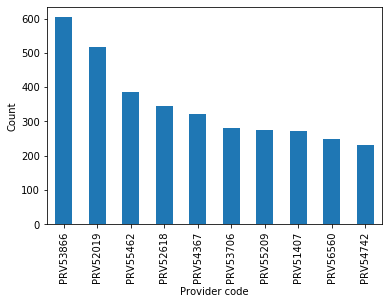

In [26]:
import seaborn as sns

plt.figure()
ip_df['Provider'].value_counts().sort_values(ascending=False).head(10).plot.bar()
plt.xlabel('Provider code')
plt.ylabel('Count')


Text(0.5, 0, 'Hospitalization duration')

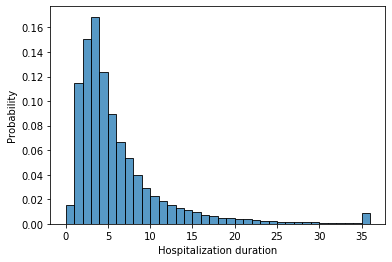

In [27]:

sns.histplot(ip_df['HospitalDuration'].map(lambda x: x.days),bins=range(37),stat='probability')
plt.ylabel('Probability')
plt.xlabel('Hospitalization duration')

Text(0.5, 0, 'Claim duration')

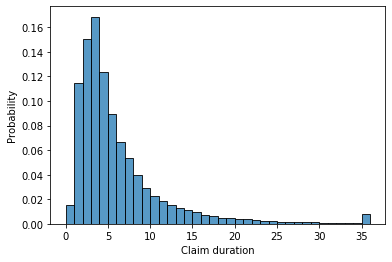

In [28]:

sns.histplot(ip_df['ClaimDuration'].map(lambda x: x.days),bins=range(37),stat='probability')
plt.ylabel('Probability')
plt.xlabel('Claim duration')


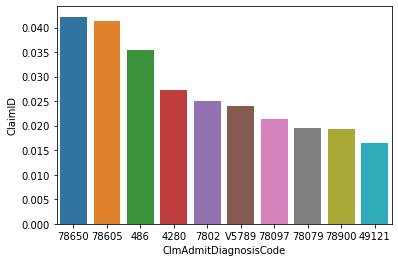

In [29]:
mydf=pd.DataFrame(ip_df.groupby('ClmAdmitDiagnosisCode').
                       ClaimID.count().sort_values(ascending=False)).head(10)
mydf.reset_index(inplace=True)
sns.barplot(x='ClmAdmitDiagnosisCode',y=mydf.ClaimID/50025,
            data=mydf)

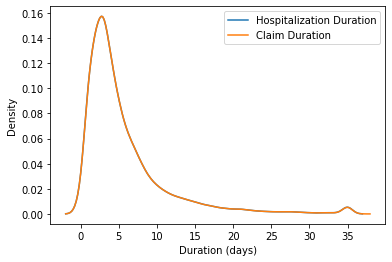

In [30]:
fig, ax = plt.subplots()

sns.kdeplot(ip_df['HospitalDuration'].map(lambda x: x.days),
                                  label = 'Hospitalization Duration', ax=ax)
sns.kdeplot(ip_df['ClaimDuration'].map(lambda x: x.days),
                                  label = 'Claim Duration',ax=ax)
plt.xlabel('Duration (days)')
plt.legend()

Text(0.5, 0, 'Reimbursement from insurnace (dollars)')

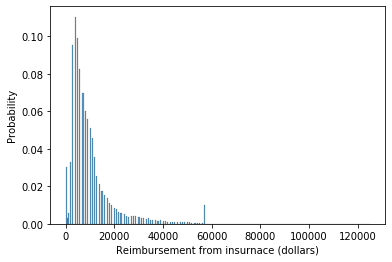

In [31]:
sns.histplot(ip_df['InscClaimAmtReimbursed'],stat='probability')
plt.ylabel('Probability')
plt.xlabel('Reimbursement from insurnace (dollars)')

Text(0.5, 0, 'Paid deductible (dollars)')

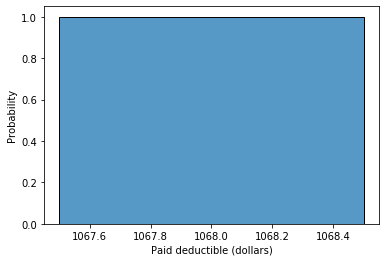

In [32]:
sns.histplot(ip_df['DeductibleAmtPaid'][ip_df.DeductibleAmtPaid>0],stat='probability')
plt.ylabel('Probability')
plt.xlabel('Paid deductible (dollars)')

In [33]:
ip_df['DeductibleAmtPaid']

0        1068.0
1        1068.0
2        1068.0
3        1068.0
4        1068.0
          ...  
50020    1068.0
50021    1068.0
50022    1068.0
50023    1068.0
50024    1068.0
Name: DeductibleAmtPaid, Length: 50025, dtype: float64

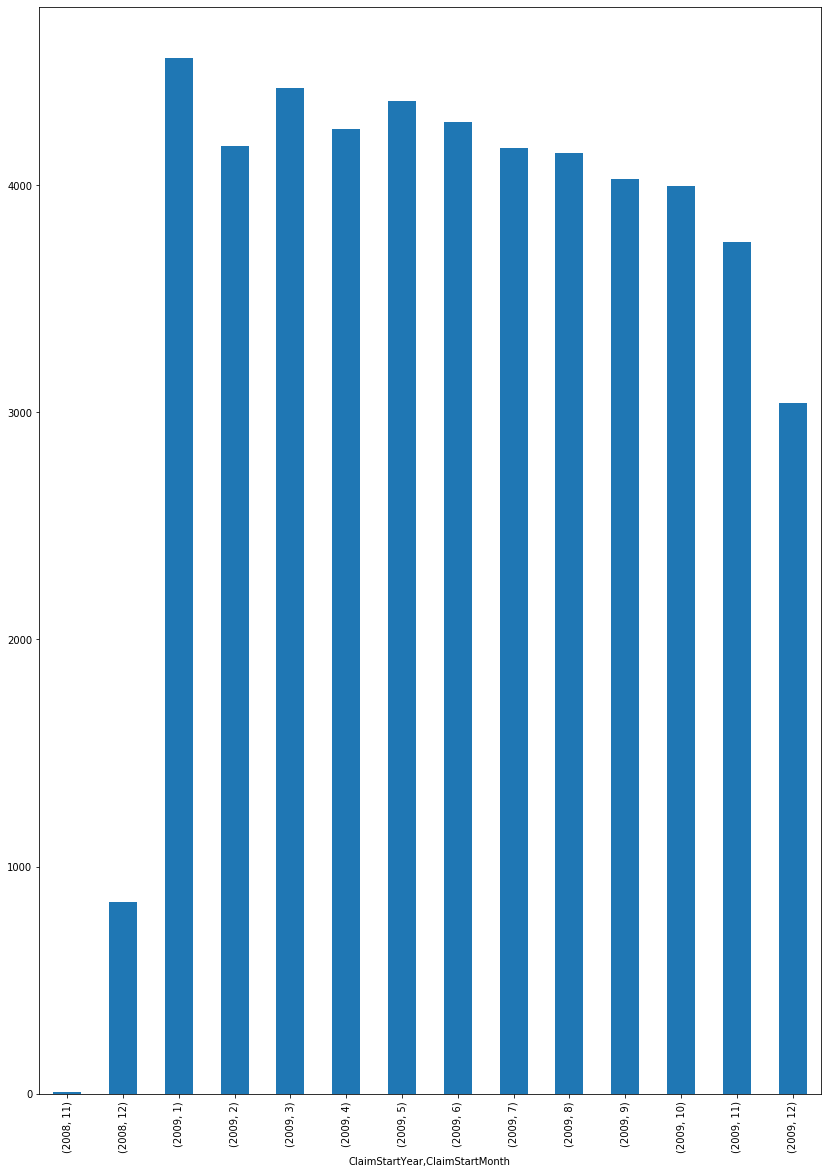

In [34]:

ip_df['ClaimStartMonth'] = ip_df['ClaimStartDt'].map(lambda x: x.month)
ip_df['ClaimStartYear'] = ip_df['ClaimStartDt'].map(lambda x: x.year)
ip_df.groupby(['ClaimStartYear','ClaimStartMonth']).ClaimID.count().plot(kind='bar',figsize=(14,20))


In [35]:
dir(ip_df.ClaimStartDt[1])

['__add__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 'ctime',
 'day',
 'fromisoformat',
 'fromordinal',
 'fromtimestamp',
 'isocalendar',
 'isoformat',
 'isoweekday',
 'max',
 'min',
 'month',
 'replace',
 'resolution',
 'strftime',
 'timetuple',
 'today',
 'toordinal',
 'weekday',
 'year']

In [36]:
op_test = pd.read_csv("Test_Outpatientdata-1542969243754.csv")
op_train = pd.read_csv("Train_Outpatientdata-1542865627584.csv")

# Combine test and train set
op_df = pd.concat((op_train, op_test)).reset_index(drop=True)

# Imputing NA values with None (should only be None)
op_df.fillna('None', inplace = True)

# Convert dates into datetime
from datetime import datetime
op_df = op_df.astype(str)
op_df['ClaimStartDt'] = op_df['ClaimStartDt'].map(lambda x: date.fromisoformat(x))
op_df['ClaimEndDt'] = op_df['ClaimEndDt'].map(lambda x: date.fromisoformat(x))
op_df['Claimduration'] = op_df['ClaimEndDt'] - op_df['ClaimStartDt']
op_df['Claimduration'] = op_df['Claimduration'].map(lambda x: x.days)

# Make a column called month for the month of claim
op_df['ClaimMonth'] = op_df['ClaimStartDt'].map(lambda x: x.month)

# Change Dollar amount to float type
op_df['InscClaimAmtReimbursed'] = op_df['InscClaimAmtReimbursed'].astype(float)
op_df['DeductibleAmtPaid'] = op_df['DeductibleAmtPaid'].astype(float)


In [37]:
op_df.head(10)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,Claimduration,ClaimMonth
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30.0,PHY326117,None,None,78943,...,None,None,None,None,None,None,0.0,56409,0,10
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80.0,PHY362868,None,None,6115,...,None,None,None,None,None,None,0.0,79380,0,2
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10.0,PHY328821,None,None,2723,...,None,None,None,None,None,None,0.0,None,0,6
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40.0,PHY334319,None,None,71988,...,None,None,None,None,None,None,0.0,None,0,1
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200.0,PHY403831,None,None,82382,...,None,None,None,None,None,None,0.0,71947,0,1
5,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20.0,PHY339887,None,None,20381,...,None,None,None,None,None,None,0.0,None,0,2
6,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40.0,PHY345721,None,None,V6546,...,None,None,None,None,None,None,0.0,None,0,3
7,BENE11004,CLM252512,2009-03-18,2009-03-18,PRV56011,200.0,PHY346833,None,PHY346833,72290,...,None,None,None,None,None,None,0.0,None,0,3
8,BENE11004,CLM322683,2009-04-25,2009-05-15,PRV56011,60.0,PHY372925,None,PHY311407,71856,...,None,None,None,None,None,None,0.0,None,20,4
9,BENE11004,CLM339500,2009-05-04,2009-05-16,PRV56011,500.0,PHY412904,None,PHY396473,7237,...,None,None,None,None,None,None,0.0,None,12,5


In [38]:
ip_df.sort_values(by='ClaimStartDt')

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,HospitalDuration,ClaimDuration,ClaimStartMonth,ClaimStartYear
34248,BENE136624,CLM31004,2008-11-27,2009-01-01,PRV55897,51000.0,PHY407408,PHY366859,None,2008-11-27,...,9904.0,3843.0,None,None,None,None,35 days,35 days,11,2008
45783,BENE93459,CLM31003,2008-11-27,2009-01-01,PRV52969,56000.0,PHY431038,PHY374974,None,2008-11-27,...,9672.0,None,None,None,None,None,35 days,35 days,11,2008
26762,BENE109092,CLM31001,2008-11-27,2009-01-01,PRV55832,10000.0,PHY402579,None,PHY402579,2008-11-27,...,None,None,None,None,None,None,35 days,35 days,11,2008
47732,BENE124211,CLM31002,2008-11-27,2009-01-01,PRV54264,12000.0,PHY372370,PHY314209,None,2008-11-27,...,3893.0,None,None,None,None,None,35 days,35 days,11,2008
19565,BENE82606,CLM31006,2008-11-28,2009-01-02,PRV56588,18000.0,PHY356371,PHY415979,None,2008-11-28,...,3249.0,None,None,None,None,None,35 days,35 days,11,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46837,BENE110546,CLM80997,2009-12-30,2009-12-31,PRV52338,16000.0,PHY373222,PHY357413,None,2009-12-30,...,3409.0,None,None,None,None,None,1 days,1 days,12,2009
46517,BENE105444,CLM81002,2009-12-30,2009-12-31,PRV54751,2000.0,PHY413350,None,None,2009-12-30,...,None,None,None,None,None,None,1 days,1 days,12,2009
32807,BENE131043,CLM81003,2009-12-30,2009-12-31,PRV54772,8000.0,PHY348341,PHY328475,None,2009-12-30,...,309.0,None,None,None,None,None,1 days,1 days,12,2009
32656,BENE130494,CLM81004,2009-12-31,2009-12-31,PRV54881,700.0,PHY425280,None,None,2009-12-31,...,None,None,None,None,None,None,0 days,0 days,12,2009


In [39]:
np.floor(6/7)

0.0

In [40]:
week0Mon=date(2008,11,24)

In [41]:
ip_df['ClaimWeek'] = ip_df['ClaimStartDt'].map(lambda x: (x-week0Mon).days//7)

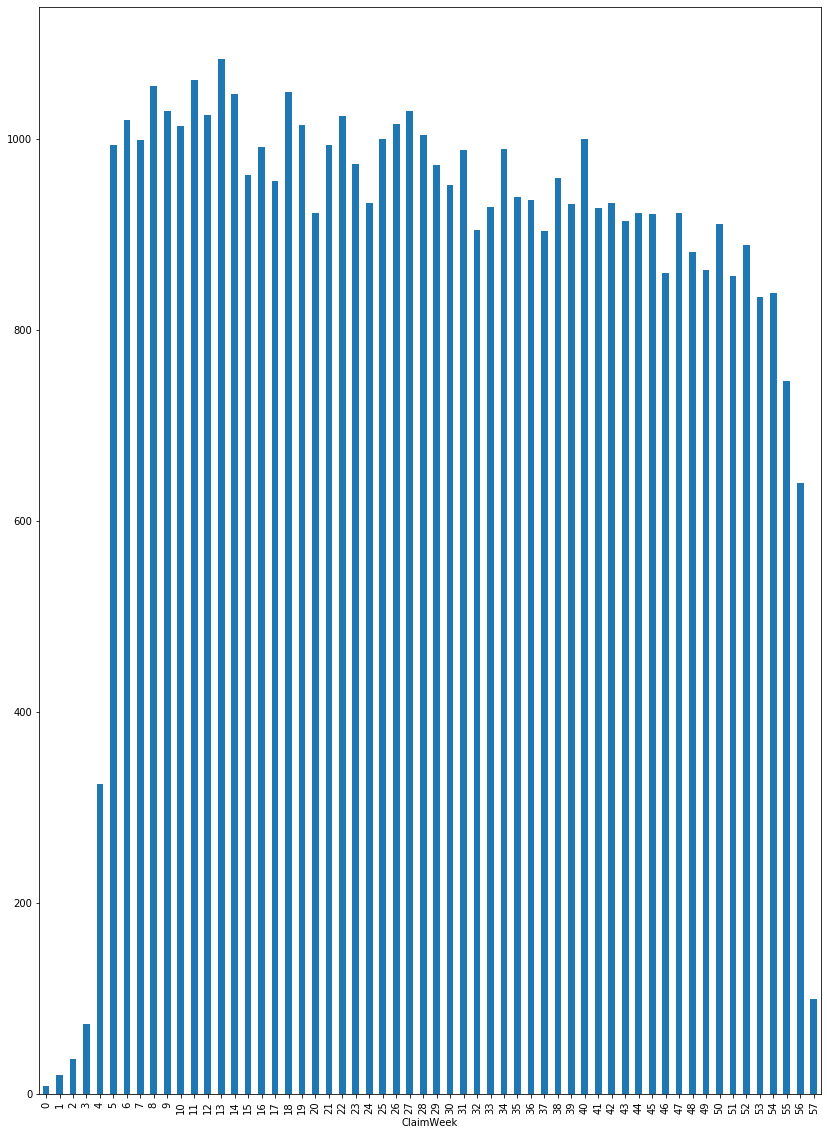

In [42]:
ip_df.groupby(['ClaimWeek']).ClaimID.count().plot(kind='bar',figsize=(14,20))

In [43]:

op_df['ClaimWeek'] = op_df['ClaimStartDt'].map(lambda x: (x-week0Mon).days//7)

In [44]:
op_df['ClaimStartDt'][2]

datetime.date(2009, 6, 27)

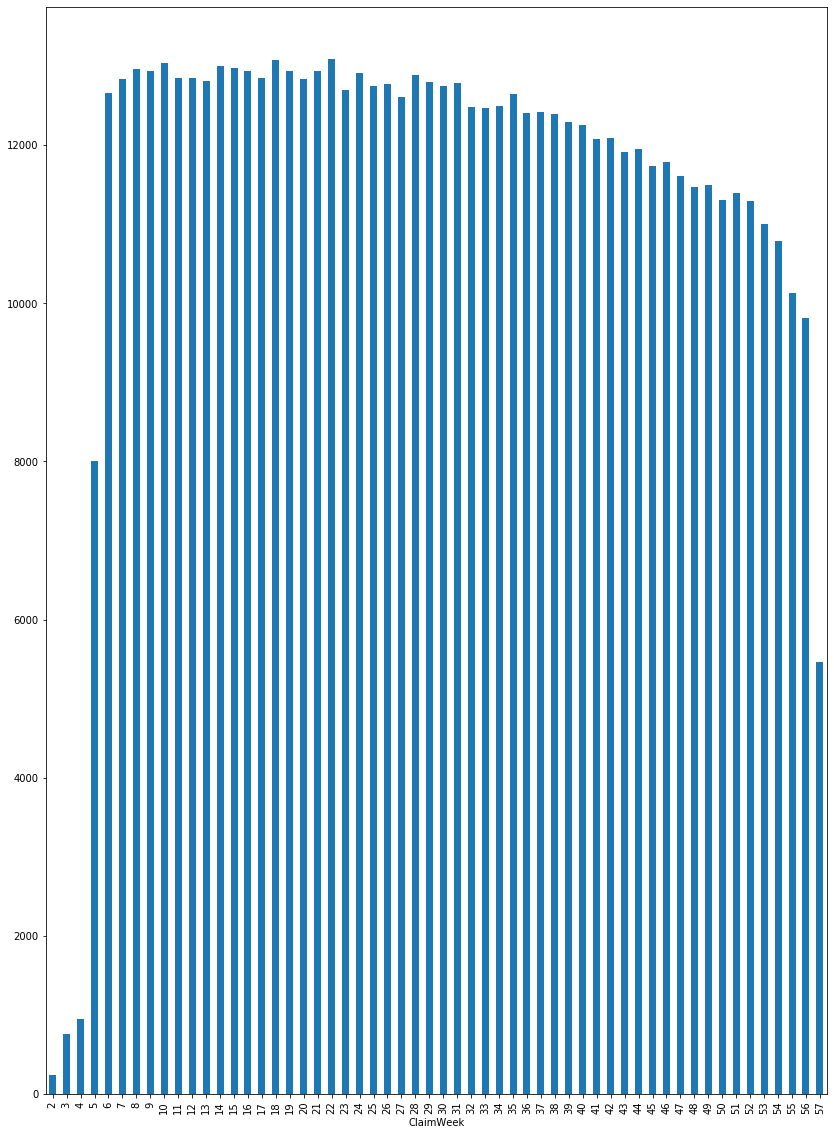

In [45]:
op_df.groupby(['ClaimWeek']).ClaimID.count().plot(kind='bar',figsize=(14,20))

In [46]:
ip_df['StartWeekDay'] = ip_df['ClaimStartDt'].map(lambda x: np.remainder((x-week0Mon).days,7))

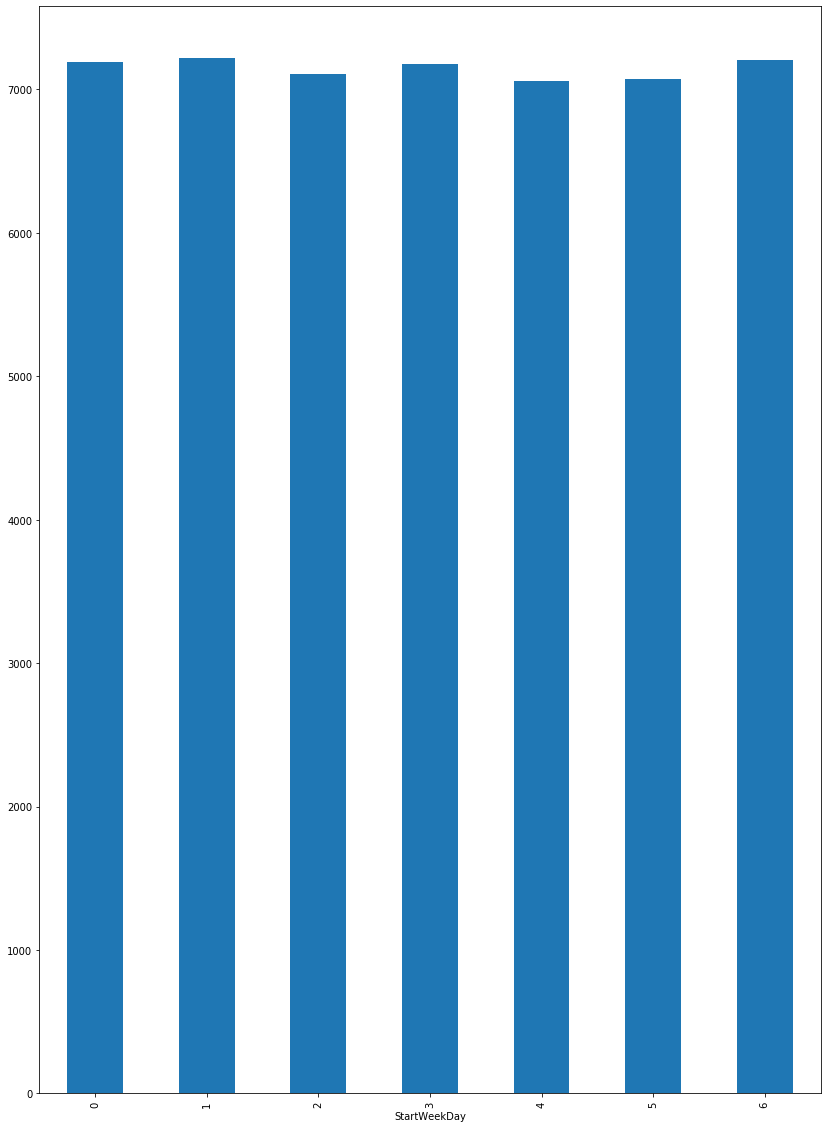

In [47]:
ip_df.groupby(['StartWeekDay']).ClaimID.count().plot(kind='bar',figsize=(14,20))

# 0 is Monday

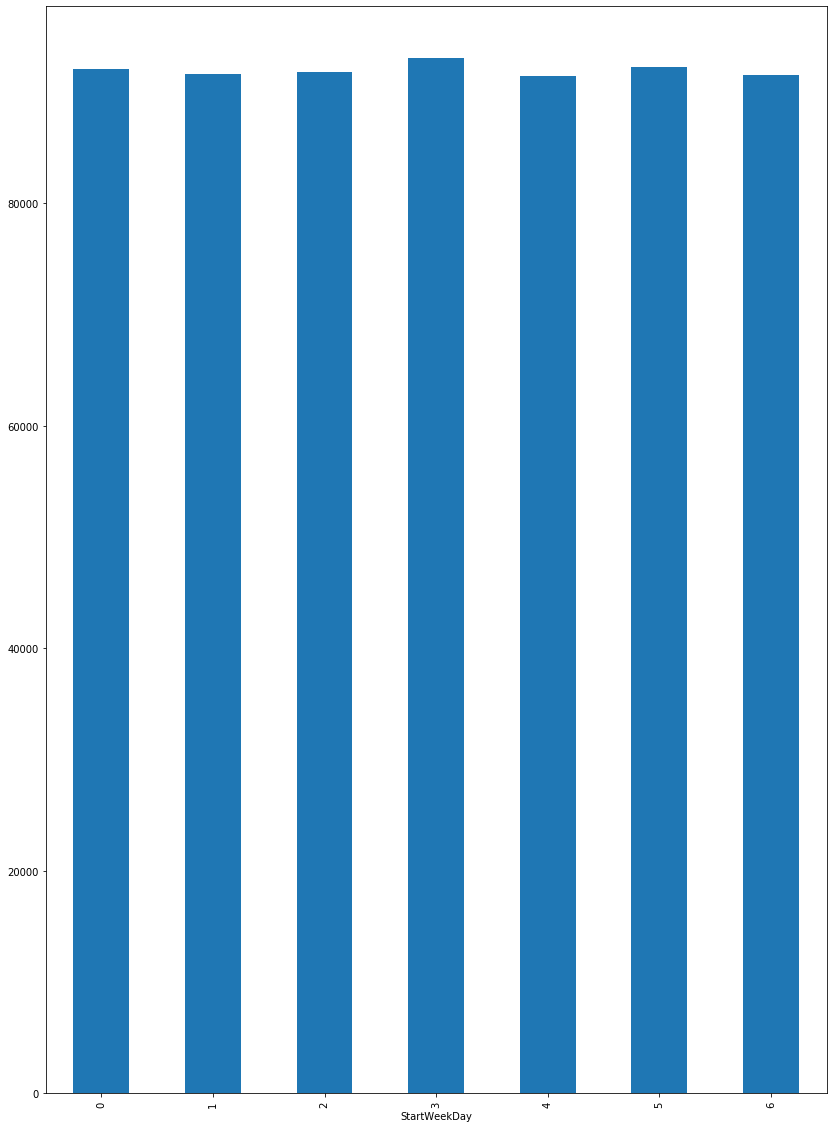

In [48]:
op_df['StartWeekDay'] = op_df['ClaimStartDt'].map(lambda x: np.remainder((x-week0Mon).days,7))
op_df.groupby(['StartWeekDay']).ClaimID.count().plot(kind='bar',figsize=(14,20))


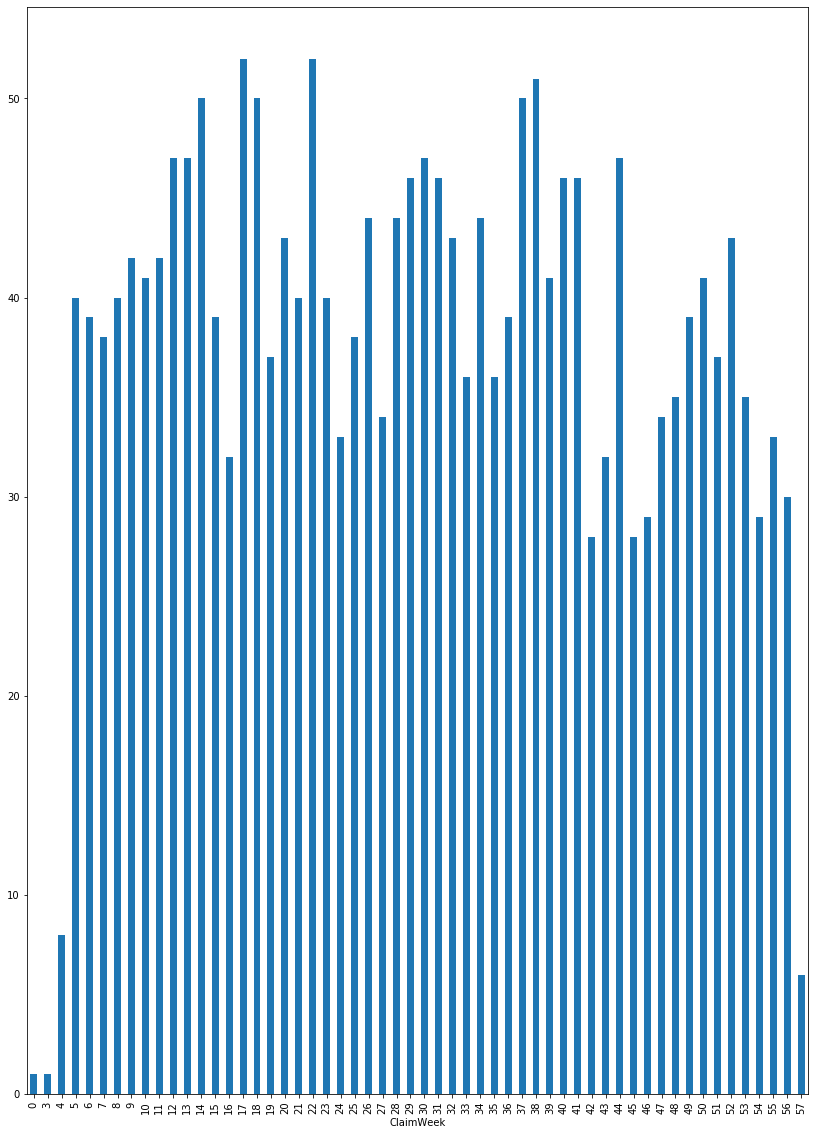

In [49]:

ip_df.loc[ip_df.ClmAdmitDiagnosisCode=='78650',].groupby(['ClaimWeek']).ClaimID.count().plot(kind='bar',figsize=(14,20))

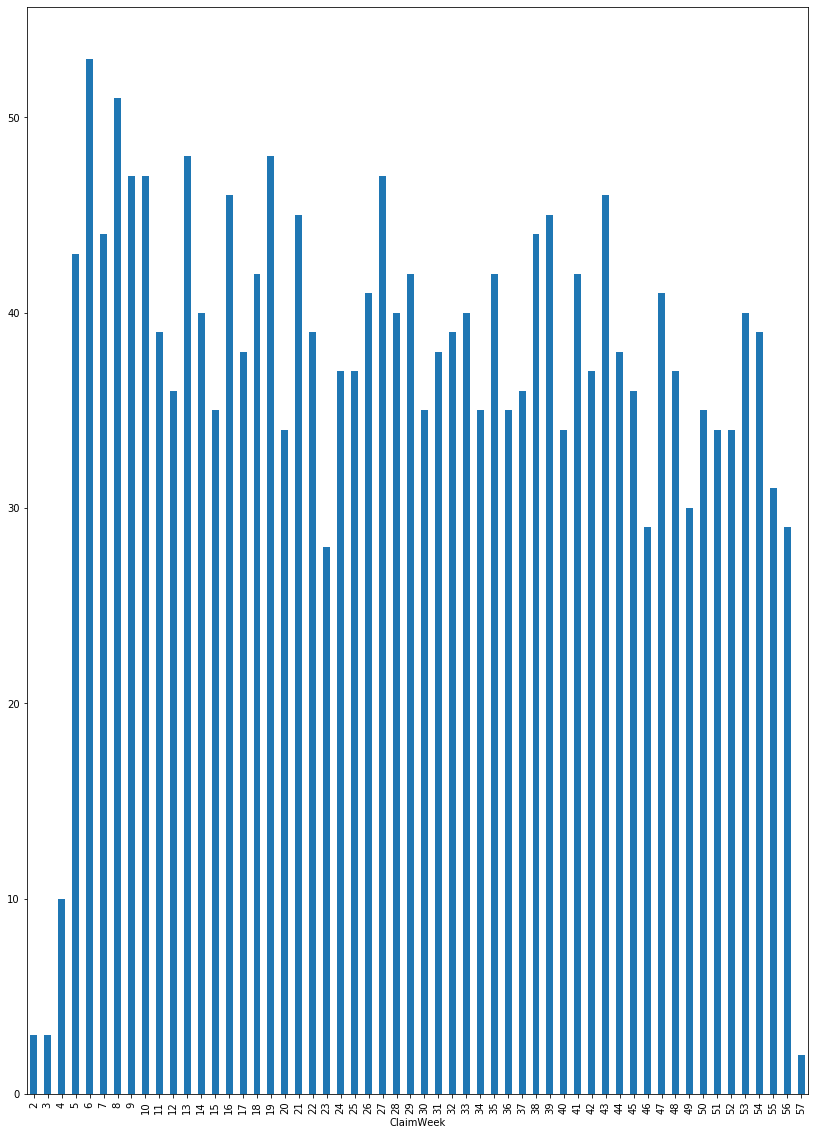

In [50]:

ip_df.loc[ip_df.ClmAdmitDiagnosisCode=='78605',].groupby(['ClaimWeek']).ClaimID.count().plot(kind='bar',figsize=(14,20))

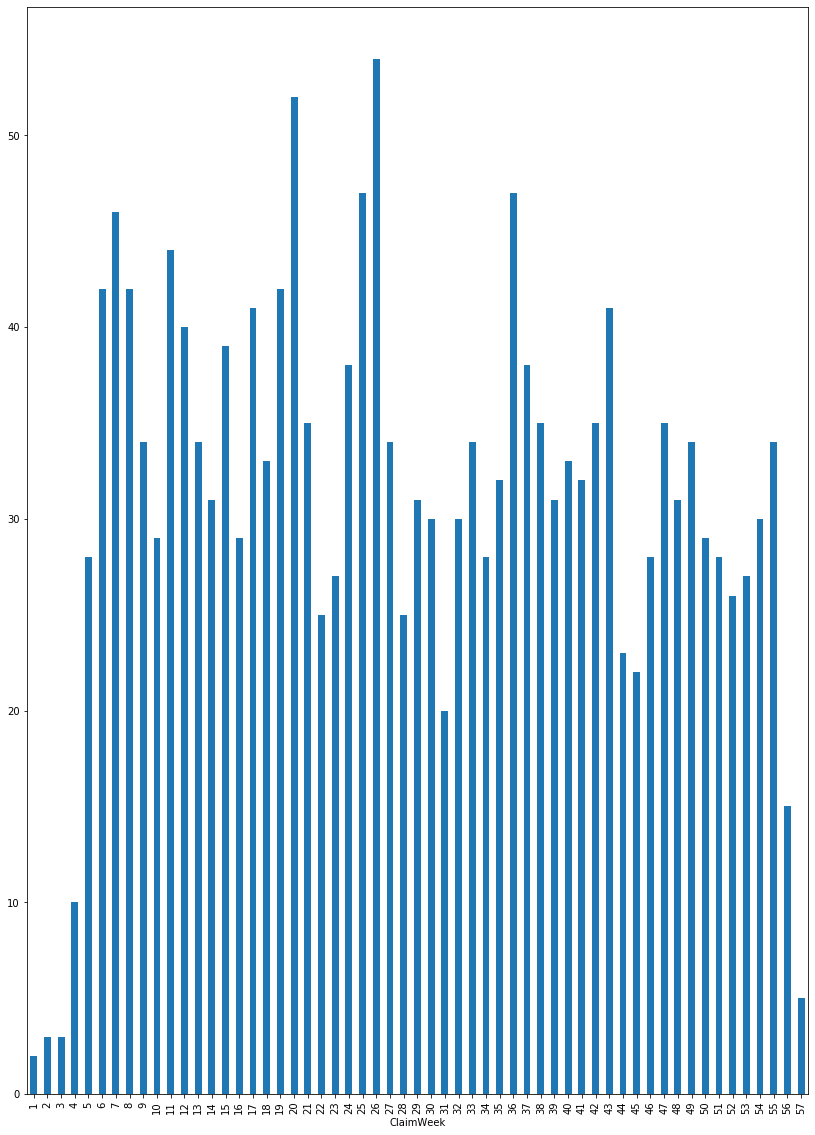

In [51]:

ip_df.loc[ip_df.ClmAdmitDiagnosisCode=='486',].groupby(['ClaimWeek']).ClaimID.count().plot(kind='bar',figsize=(14,20))

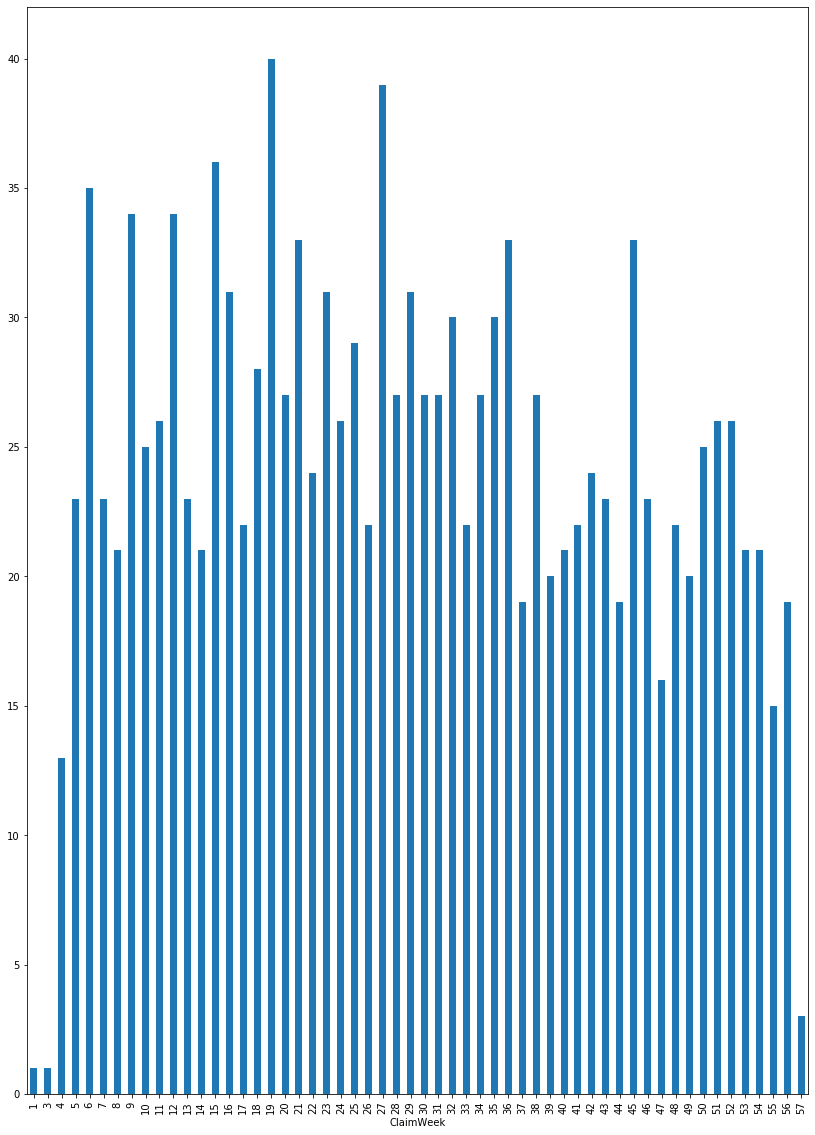

In [52]:

ip_df.loc[ip_df.ClmAdmitDiagnosisCode=='4280',].groupby(['ClaimWeek']).ClaimID.count().plot(kind='bar',figsize=(14,20))

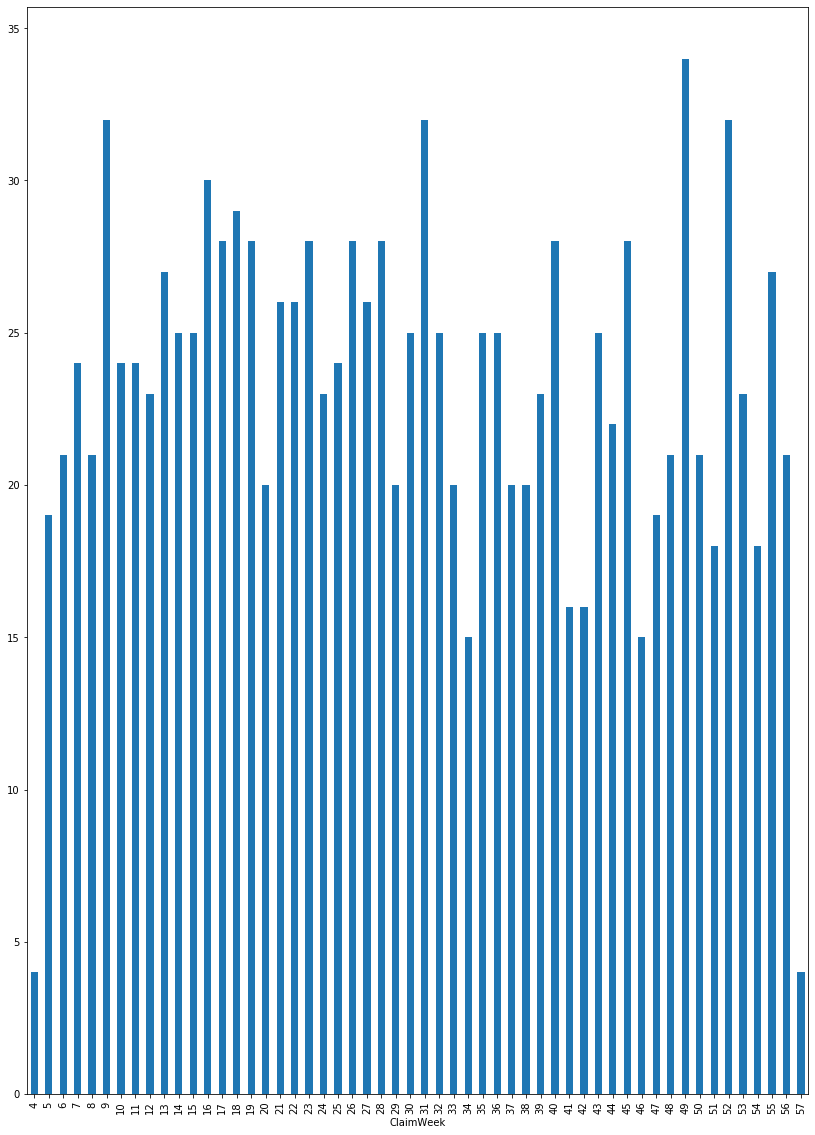

In [53]:

ip_df.loc[ip_df.ClmAdmitDiagnosisCode=='7802',].groupby(['ClaimWeek']).ClaimID.count().plot(kind='bar',figsize=(14,20))

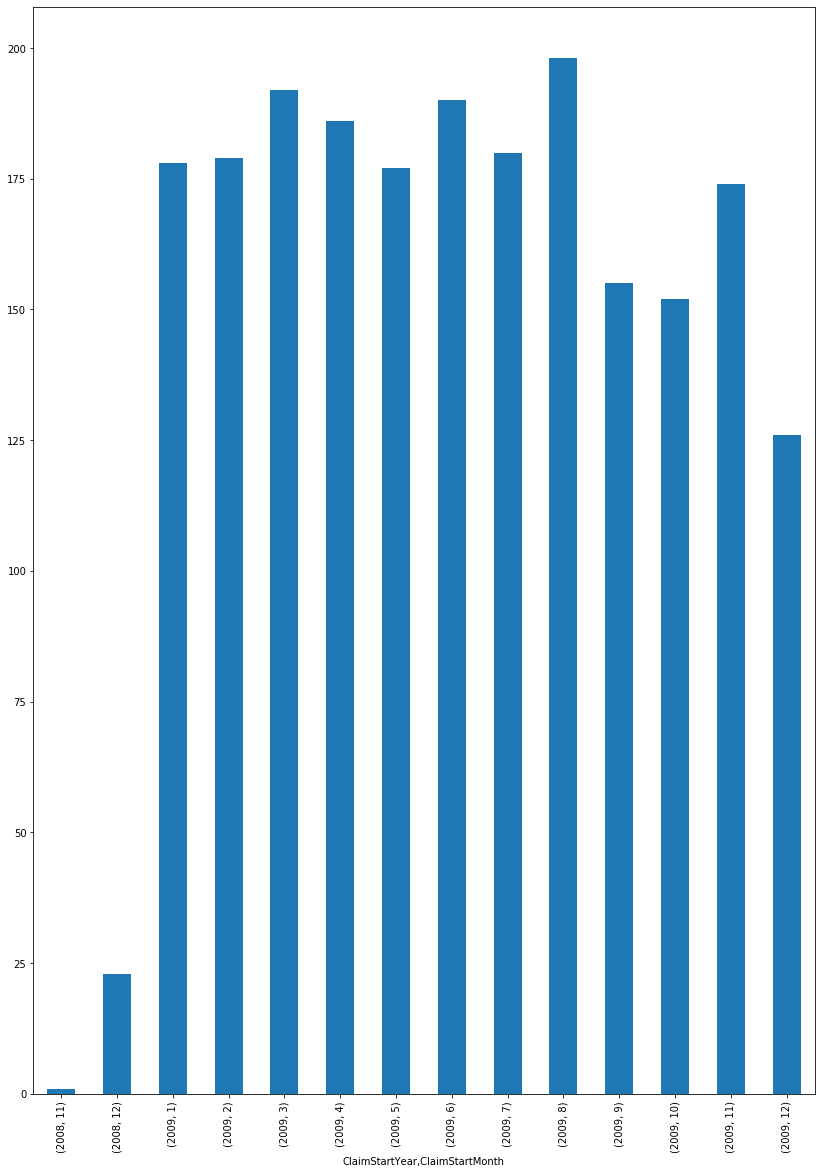

In [54]:
ip_df.loc[ip_df.ClmAdmitDiagnosisCode=='78650',].groupby(['ClaimStartYear','ClaimStartMonth']).ClaimID.count().plot(kind='bar',figsize=(14,20))

(643578, 31)

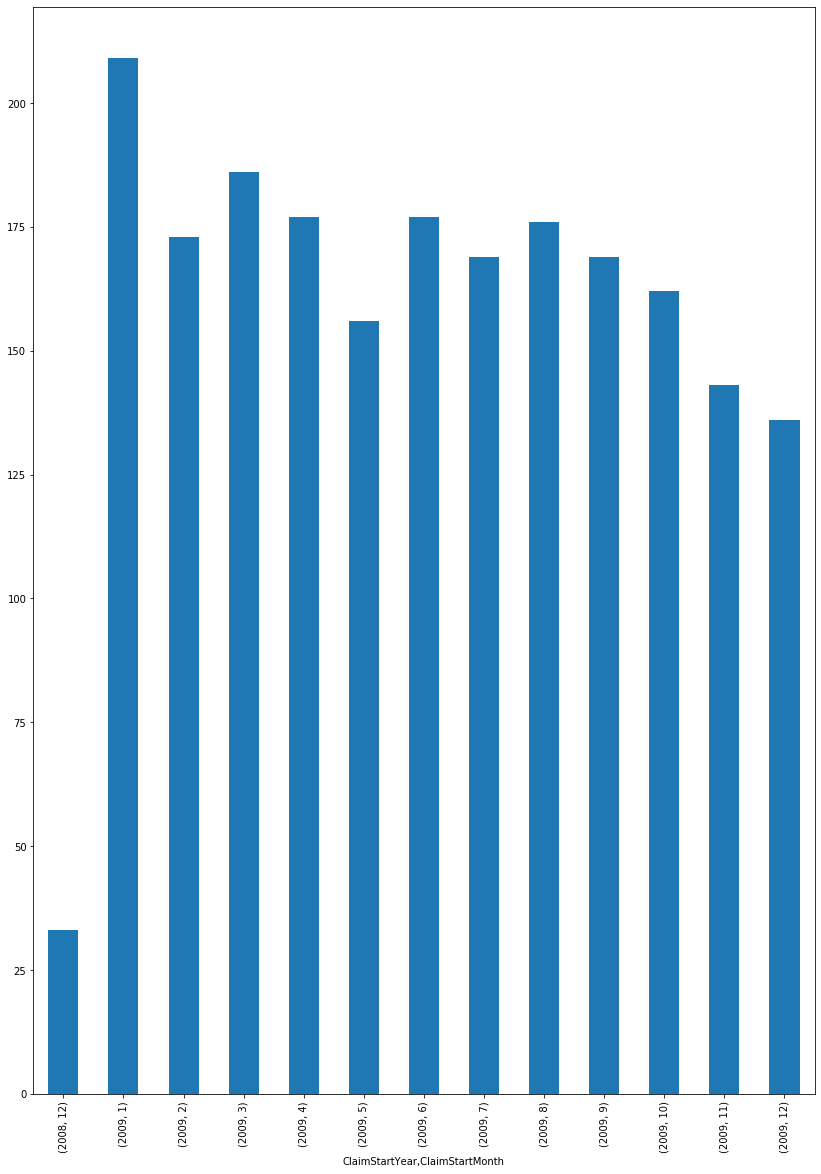

In [55]:
ip_df.loc[ip_df.ClmAdmitDiagnosisCode=='78605',].groupby(['ClaimStartYear','ClaimStartMonth']).ClaimID.count().plot(kind='bar',figsize=(14,20))
op_df.shape

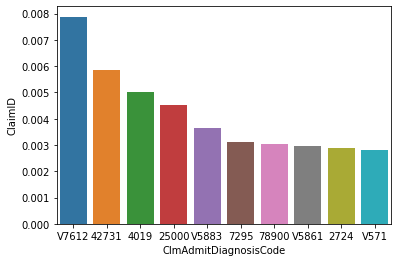

In [56]:
mydf=pd.DataFrame(op_df.loc[op_df.ClmAdmitDiagnosisCode!='None',].groupby('ClmAdmitDiagnosisCode').
                       ClaimID.count().sort_values(ascending=False)).head(10)
mydf.reset_index(inplace=True)
sns.barplot(x='ClmAdmitDiagnosisCode',y=mydf.ClaimID/643578,
            data=mydf)

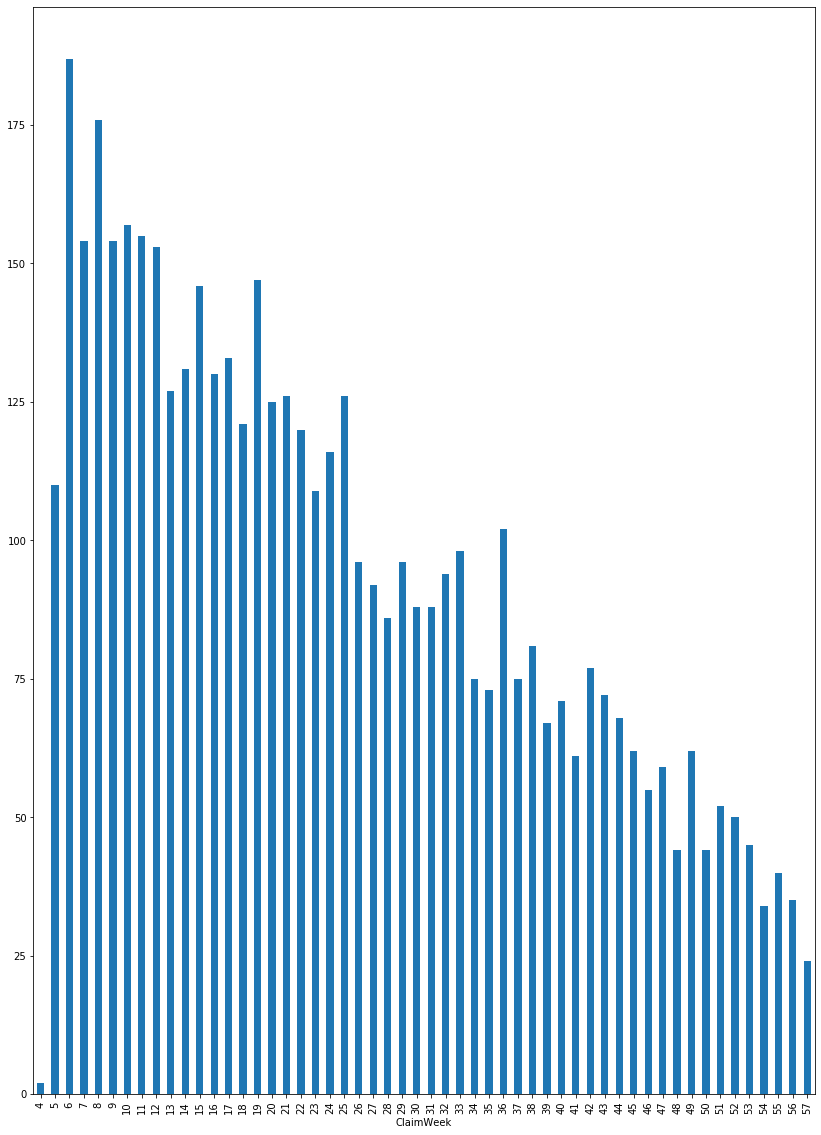

In [57]:
op_df.loc[op_df.ClmAdmitDiagnosisCode=='V7612',].groupby(['ClaimWeek']).ClaimID.count().plot(kind='bar',figsize=(14,20))

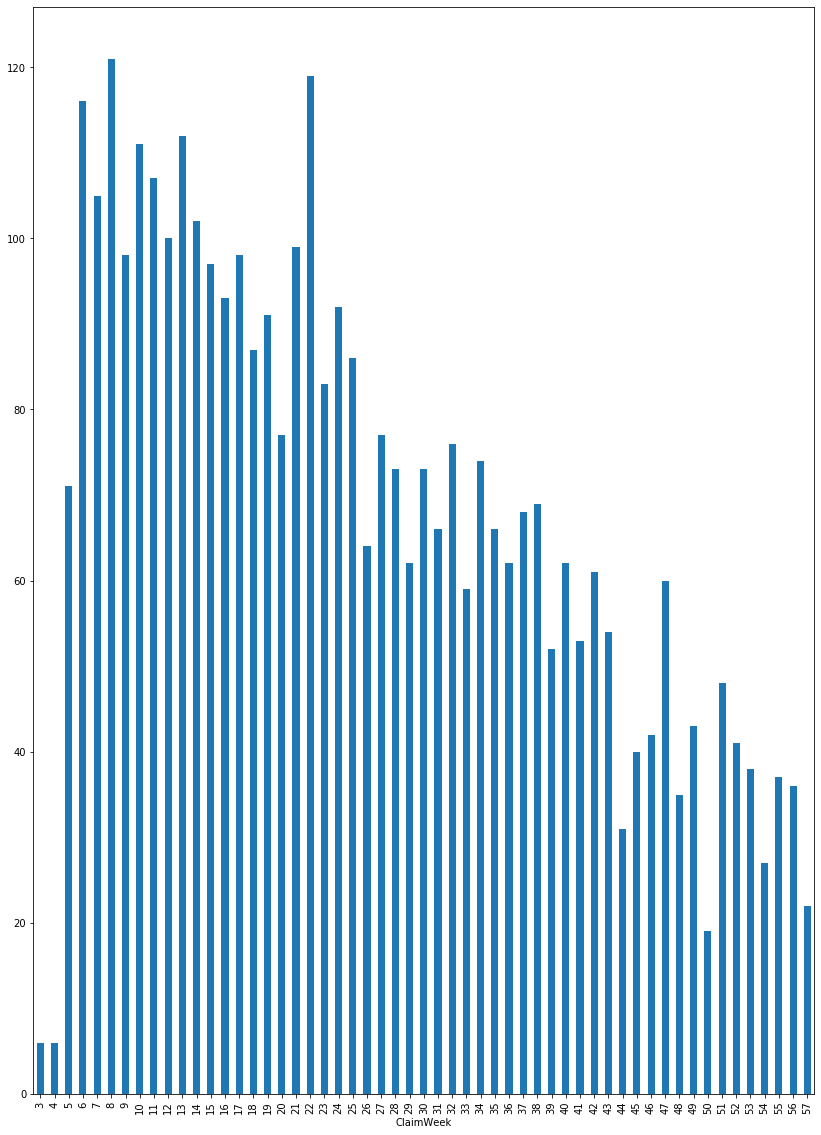

In [58]:
op_df.loc[op_df.ClmAdmitDiagnosisCode=='42731',].groupby(['ClaimWeek']).ClaimID.count().plot(kind='bar',figsize=(14,20))

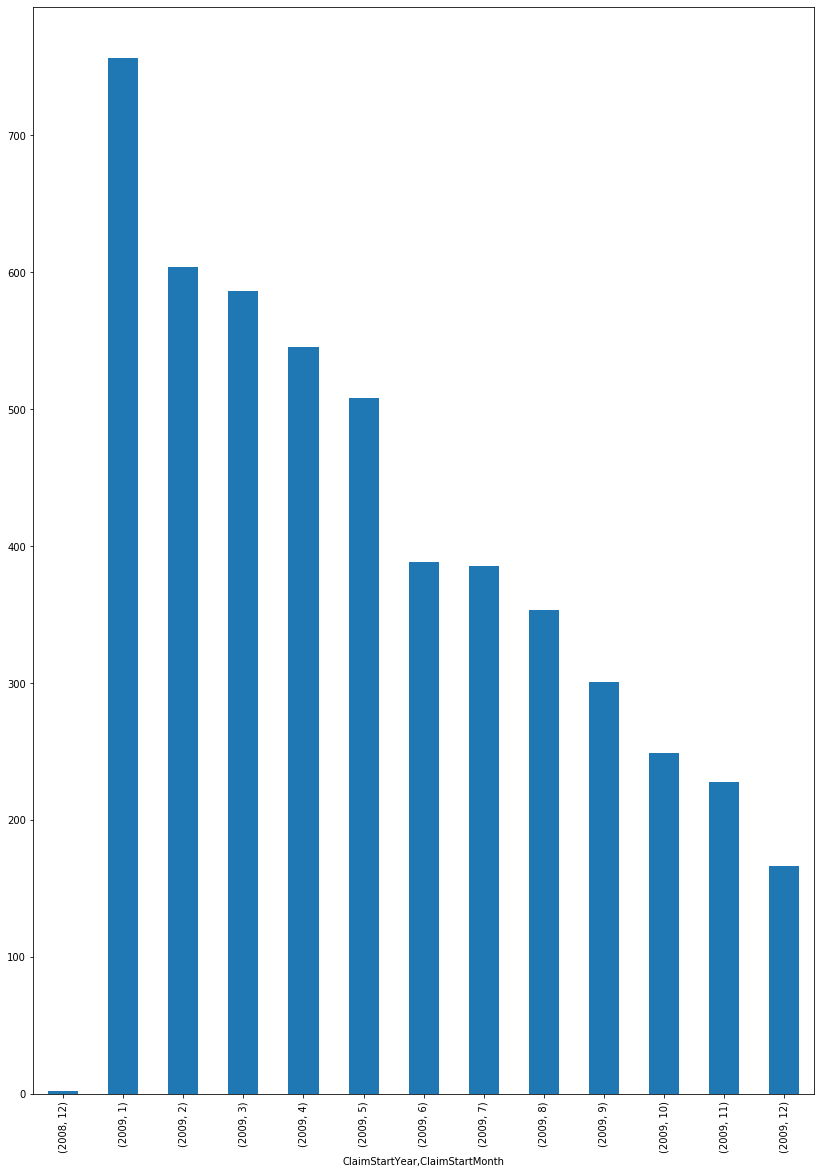

In [59]:
op_df['ClaimStartMonth'] = op_df['ClaimStartDt'].map(lambda x: x.month)
op_df['ClaimStartYear'] = op_df['ClaimStartDt'].map(lambda x: x.year)
op_df.loc[op_df.ClmAdmitDiagnosisCode=='V7612',].groupby(['ClaimStartYear','ClaimStartMonth']).ClaimID.count().plot(kind='bar',figsize=(14,20))


In [60]:
dir(ip_df)

['AdmissionDt',
 'AttendingPhysician',
 'BeneID',
 'ClaimDuration',
 'ClaimEndDt',
 'ClaimID',
 'ClaimStartDt',
 'ClaimStartMonth',
 'ClaimStartYear',
 'ClaimWeek',
 'ClmAdmitDiagnosisCode',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_10',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5',
 'ClmProcedureCode_6',
 'DeductibleAmtPaid',
 'DiagnosisGroupCode',
 'DischargeDt',
 'HospitalDuration',
 'InscClaimAmtReimbursed',
 'OperatingPhysician',
 'OtherPhysician',
 'Provider',
 'StartWeekDay',
 'T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__cla

In [61]:
pd.pivot_table(values='ClaimID',data=ip_df,columns=['ClaimStartMonth'], index=['Provider'],aggfunc=np.size,fill_value=0).head(20)

ClaimStartMonth,1,2,3,4,5,6,7,8,9,10,11,12
Provider,,,,,,,,,,,,
PRV51001,0,2,0,0,2,0,1,0,0,0,0,0
PRV51003,6,9,4,6,4,5,6,5,5,5,5,2
PRV51007,0,0,1,0,1,0,0,1,0,0,0,0
PRV51008,0,0,0,1,0,1,0,0,0,0,0,0
PRV51009,1,0,0,1,0,0,0,0,0,0,0,0
PRV51010,1,0,1,0,1,0,0,0,1,2,0,0
PRV51011,0,0,0,0,0,0,0,0,0,1,0,0
PRV51020,1,0,0,0,0,0,0,0,0,0,1,0
PRV51021,7,3,3,1,4,1,1,1,1,1,0,6


In [62]:
pd.pivot_table(values='ClaimID',data=op_df,columns=['ClaimStartMonth'], index=['Provider'],aggfunc=np.size,fill_value=0).sample(20)

ClaimStartMonth,1,2,3,4,5,6,7,8,9,10,11,12
Provider,,,,,,,,,,,,
PRV57742,1,0,1,0,0,2,1,0,0,0,0,3
PRV53800,5,8,8,3,11,2,4,5,6,9,4,12
PRV54859,0,1,3,3,6,2,1,1,2,3,2,1
PRV57226,56,48,62,43,69,53,46,52,49,41,57,36
PRV52835,1,5,4,6,7,2,5,2,5,4,1,4
PRV55393,7,10,4,14,7,7,13,11,6,7,5,13
PRV51604,29,20,21,28,14,21,31,23,29,30,17,16
PRV55003,4,8,8,7,2,8,10,5,6,4,5,4
PRV53255,1,2,0,2,1,2,2,3,5,3,1,4


In [ ]:
from preprocess_module import fraud_preprocessor 

In [ ]:
iptrain_df, iptest_df, optrain_df, optest_df, benetrain_df, benetest_df, label_train_df, label_test_df = fraud_preprocessor(1)

In [ ]:

ip_op_train = pd.concat((iptrain_df, optrain_df), axis=0)
trainset = pd.merge(ip_op_train, benetrain_df, on = 'BeneID', how = 'left')
trainset = pd.merge(trainset, label_train_df, how = 'inner', on = 'Provider')
full_df = trainset

In [ ]:
full_df[full_df.PotentialFraud==1].groupby('ClaimMonth').BeneID.count().plot(kind='bar',figsize=(14,20))

In [ ]:
full_df[full_df.PotentialFraud==0].groupby('ClaimMonth').Provider.nunique().plot(kind='bar',figsize=(14,20))

In [ ]:
full_df['ClaimStartWeek'] = full_df['ClaimStartDt'].map(lambda x: (x-week0Mon).days//7)

In [ ]:
plt.figure()
full_df[full_df.PotentialFraud==0].groupby('ClaimStartWeek').ClaimID.nunique().plot(kind='line')
full_df.loc[full_df.PotentialFraud==1,:].groupby('ClaimStartWeek').ClaimID.nunique().plot(kind='line')
plt.xlabel('Claim Start Week')
plt.ylabel('Number of Claims')
plt.legend(['Normal','Fraud'])
plt.savefig('ClaimStartWeek.png')
full_df.ClaimStartDt.min()

In [ ]:
full_df['ClaimStartWeekDay']=full_df['ClaimStartDt'].map(lambda x: np.remainder((x-week0Mon).days,7))
full_df[full_df.PotentialFraud==0].groupby('ClaimStartWeekDay').ClaimID.nunique().plot(kind='line')
full_df.loc[full_df.PotentialFraud==1,:].groupby('ClaimStartWeekDay').ClaimID.nunique().plot(kind='line')
plt.xlabel('Claim Start Weekday')
plt.ylabel('Number of Claims')
plt.legend(['Normal','Fraud'])
plt.savefig('ClaimStartWeekDay.png')

In [ ]:
full_df['ClaimStartMonthDay']=full_df['ClaimStartDt'].map(lambda x: x.day)
full_df[full_df.PotentialFraud==0].groupby('ClaimStartMonthDay').ClaimID.nunique().plot(kind='line')
full_df.loc[full_df.PotentialFraud==1,:].groupby('ClaimStartMonthDay').ClaimID.nunique().plot(kind='line')
plt.xlabel('Claim Start Month Day')
plt.ylabel('Number of Claims')
plt.legend(['Normal','Fraud'])
plt.savefig('ClaimStartMonthDay.png')

In [ ]:
full_df['ClaimMonthEndDay']=full_df['ClaimEndDt'].map(lambda x: x.day)
full_df[full_df.PotentialFraud==0].groupby('ClaimMonthEndDay').ClaimID.nunique().plot(kind='line')
full_df.loc[full_df.PotentialFraud==1,:].groupby('ClaimMonthEndDay').ClaimID.nunique().plot(kind='line')
plt.xlabel('Claim End Month Day')
plt.ylabel('Number of Claims')
plt.legend(['Normal','Fraud'])
plt.savefig('ClaimMonthEndDay.png')

In [ ]:
full_df['ClaimWeekEndDay']=full_df['ClaimEndDt'].map(lambda x: np.remainder((x-week0Mon).days,7))
full_df[full_df.PotentialFraud==0].groupby('ClaimWeekEndDay').ClaimID.nunique().plot(kind='line')
full_df.loc[full_df.PotentialFraud==1,:].groupby('ClaimWeekEndDay').ClaimID.nunique().plot(kind='line')
plt.xlabel('Claim End Weekday')
plt.ylabel('Number of Claims')
plt.legend(['Normal','Fraud'])
plt.savefig('ClaimEndWeekDay.png')

In [ ]:
full_df['ClaimEndWeek'] = full_df['ClaimEndDt'].map(lambda x: (x-week0Mon).days//7)
full_df[full_df.PotentialFraud==0].groupby('ClaimEndWeek').ClaimID.nunique().plot(kind='line')
full_df.loc[full_df.PotentialFraud==1,:].groupby('ClaimEndWeek').ClaimID.nunique().plot(kind='line')
plt.xlabel('Claim End Week')
plt.ylabel('Number of Claims')
plt.legend(['Normal','Fraud'])
plt.savefig('ClaimEndWeek.png')